# Chapter 6: Exercises 28-34

For Exercises 28–34, work with the bank_marketing_training and bank_marketing_test data sets. Use either Python or R to solve each problem.

<ol start=28><li>Create a CART model using the training data set that predicts Response using whatever predictors you think appropriate. Visualize the decision tree. Describe the first few splits in the decision tree.
<li>Develop a CART model using the test data set and the same target and predictor variables. Visualize the decision tree. Investigate the splits in the decision tree. Does the tree built using the test data match the tree built using the training data?
<li>Build a C5.0 model using the training data set that predicts Response and the same target and predictor variables. Specify a minimum of 1000 cases per terminal node. Visualize the decision tree. Describe the first few splits in the decision tree.
<li>How does your C5.0 model compare to your CART model for the bank_marketing_training data? Describe the similarities and differences.
<li>Create a C5.0 model using the test data set that utilizes the same target variable, predictor variables, and minimum cases criterion. Visualize the decision tree. Does the tree built using the test data match the tree built using the training data?
<li>Use random forests on the training data set to obtain the predicted value of Response using the same predictor variables as in the CART and C5.0 models.
<li>Use random forests on the test data set to obtain the predicted value of Response in the test data set. Build a table comparing the predictions from the training and test data sets. How do they compare?</ol>

In [37]:
# Importing all the necessary packages, pandas, numpy, graphviz, statsmodels, and sklearn
import pandas as pd
import numpy as np
import graphviz
import statsmodels.tools.tools as stattools
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# Read the data from the csv files
bank_tr = pd.read_csv(r'C:\Users\jacob\Downloads\DSPR_Data_Sets\Website Data Sets\bank_marketing_training')
bank_test = pd.read_csv(r'C:\Users\jacob\Downloads\DSPR_Data_Sets\Website Data Sets\bank_marketing_test')
y = bank_tr[['response']] # Saving the response variable as y
# Inspect the data
bank_test.head(n=10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,days_since_previous,previous,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
5,57,housemaid,divorced,basic.4y,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
6,35,blue-collar,married,basic.6y,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
7,39,management,single,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
8,30,unemployed,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
9,55,retired,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [35]:
# See how many rows are in the data set
bank_test.shape

(26874, 21)

# 28. Create a CART model using the training data set that predicts Response using whatever predictors you think appropriate. Visualize the decision tree. Describe the first few splits in the decision tree.

In [38]:
#prev_outcome_np = np.array(bank_tr['previous_outcome'])
mar_np = np.array(bank_tr['marital']) # turning marital status into an array to create a matrix of dummy variables
(mar_cat, mar_cat_dict) = stattools.categorical(mar_np, drop=True, dictnames=True)
mar_cat_dict

{0: 'divorced', 1: 'married', 2: 'single', 3: 'unknown'}

In [86]:
ed_np = np.array(bank_tr['education']) #Turn education into an array to create a matrix of dummy variables
(ed_cat, ed_cat_dict) = stattools.categorical(ed_np, drop=True, dictnames=True)
ed_cat_dict
                                             

{0: 'basic.4y',
 1: 'basic.6y',
 2: 'basic.9y',
 3: 'high.school',
 4: 'illiterate',
 5: 'professional.course',
 6: 'university.degree',
 7: 'unknown'}

In [74]:
y_names = ["No","Yes"]
y

,response
0,no
1,no
2,no
3,no
4,no
...,...
26869,no
26870,yes
26871,no
26872,yes


In [67]:
# Creating the matrix to use the Marital category as a predictor
mar_cat_pd = pd.DataFrame(mar_cat)
X = pd.concat((bank_tr[['age']], mar_cat_pd), axis = 1)
X_name = ["Age", "Divorced", "Married", "Single", "Unknown"]
X #Inspect the df created

DecisionTreeClassifier(max_leaf_nodes=5)

In [87]:
# Creating a matrix to use the Education category as a predictor
ed_cat_pd=pd.DataFrame(ed_cat)
W = pd.concat((bank_tr[['age']], ed_cat_pd), axis=1)
W_name = ["Age", "4y", "6y", "9y", "HS", "Illiterate", "ProCourse", "Uni", "Unk"]
W #Inspect the df created

In [93]:
# Running the decision tree classifier algorith
cart04 = DecisionTreeClassifier(criterion = "gini", max_leaf_nodes=5).fit(X,y)


In [94]:
export_graphviz(cart04, out_file = "cart04.dot", 
               feature_names = X_name, 
                class_names = y_names, 
                rotate=True, proportion=True, 
                filled=True) #, class_names = y_names

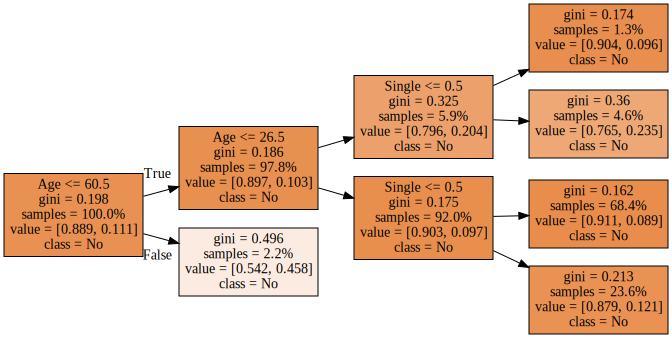

In [95]:
predIncomeCART = cart04.predict(X)
graphviz.render('dot', 'png', 'cart04.dot')
graphviz.Source.from_file('cart04.dot')

# 29 Develop a CART model using the test data set and the same target and predictor variables. Visualize the decision tree. Investigate the splits in the decision tree. Does the tree built using the test data match the tree built using the training data?

In [100]:
y_tst = bank_test[['age']]
mar_np = np.array(bank_test['marital']) # turning marital status into an array to create a matrix of dummy variables
(mar_cat, mar_cat_dict) = stattools.categorical(mar_np, drop=True, dictnames=True)
mar_cat_dict

{0: 'divorced', 1: 'married', 2: 'single', 3: 'unknown'}

In [101]:
ed_np = np.array(bank_test['education']) #Turn education into an array to create a matrix of dummy variables
(ed_cat, ed_cat_dict) = stattools.categorical(ed_np, drop=True, dictnames=True)
ed_cat_dict
              

{0: 'basic.4y',
 1: 'basic.6y',
 2: 'basic.9y',
 3: 'high.school',
 4: 'illiterate',
 5: 'professional.course',
 6: 'university.degree',
 7: 'unknown'}

In [102]:
y_names = ["No","Yes"]
y_tst

,age
0,56
1,57
2,41
3,25
4,29
...,...
26869,36
26870,37
26871,29
26872,73


In [103]:
# Creating the matrix to use the Marital category as a predictor
mar_cat_pd = pd.DataFrame(mar_cat)
X = pd.concat((bank_test[['age']], mar_cat_pd), axis = 1)
X_name = ["Age", "Divorced", "Married", "Single", "Unknown"]
X #Inspect the df created

,age,0,1,2,3
0,56,0.0,1.0,0.0,0.0
1,57,0.0,1.0,0.0,0.0
2,41,0.0,1.0,0.0,0.0
3,25,0.0,0.0,1.0,0.0
4,29,0.0,0.0,1.0,0.0
...,...,...,...,...,...
26869,36,0.0,1.0,0.0,0.0
26870,37,0.0,1.0,0.0,0.0
26871,29,0.0,0.0,1.0,0.0
26872,73,0.0,1.0,0.0,0.0


In [104]:
# Creating a matrix to use the Education category as a predictor
ed_cat_pd=pd.DataFrame(ed_cat)
W = pd.concat((bank_test[['age']], ed_cat_pd), axis=1)
W_name = ["Age", "4y", "6y", "9y", "HS", "Illiterate", "ProCourse", "Uni", "Unk"]
W #Inspect the df created

,age,0,1,2,3,4,5,6,7
0,56,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,57,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,25,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,29,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
26869,36,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
26870,37,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
26871,29,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26872,73,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [105]:
# Running the decision tree classifier algorith
cart05 = DecisionTreeClassifier(criterion = "gini", max_leaf_nodes=5).fit(X,y_tst)

In [133]:
export_graphviz(cart04, out_file = "cart05.dot", 
               feature_names = X_name, 
                class_names = y_names, 
                rotate=True, proportion=True, 
                filled=True) #, class_names = y_names

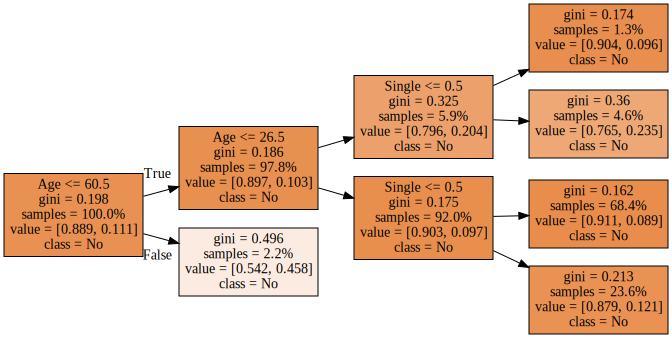

In [107]:
predIncomeCART = cart05.predict(X)
graphviz.render('dot', 'png', 'cart05.dot')
graphviz.Source.from_file('cart05.dot')

In [98]:
# y = bank_test[['age']]
# #prev_outcome_np = np.array(bank_tr['previous_outcome'])
# mar_np = np.array(bank_test['marital'])
# (mar_cat, mar_cat_dict) = stattools.categorical(mar_np, drop=True, dictnames=True)
# mar_cat_dict
# mar_cat_pd = pd.DataFrame(mar_cat)
# X = pd.concat((bank_test[['age']], mar_cat_pd), axis = 1)
# X_name = ["Age", "Divorced", "Married", "Single", "Unknown"]
# cart02 = DecisionTreeClassifier(criterion = "gini", max_leaf_nodes=5).fit(X,y)
# #export_graphviz(cart02, out_file = "cart02.dot", feature_names = X_name, class_names = y)
# predIncomeCART = cart02.predict(X)
# #graphviz.render('dot', 'png', 'cart02.dot')
# #graphviz.Source.from_file('cart02.dot')
# graphviz.render('dot', 'png', 'cart02.dot')
# graphviz.Source.from_file('cart02.dot')

In [99]:
# # Testing a copy/paste of code above

# y = bank_test[['age']]
# #prev_outcome_np = np.array(bank_tr['previous_outcome'])
# mar_np = np.array(bank_test['marital'])
# (mar_cat, mar_cat_dict) = stattools.categorical(mar_np, drop=True, dictnames=True)
# mar_cat_dict

# mar_cat_pd = pd.DataFrame(mar_cat)
# X = pd.concat((bank_test[['age']], mar_cat_pd), axis = 1)
# X_name = ["Age", "Divorced", "Married", "Single", "Unknown"]
# cart02 = DecisionTreeClassifier(criterion = "gini", max_leaf_nodes=5).fit(X,y)
# predIncomeCART = cart02.predict(X)
# graphviz.render('dot', 'png', 'cart02.dot')
# graphviz.Source.from_file('cart02.dot')

In [131]:
y.shape

(26874, 1)

In [132]:
X.shape

(26874, 5)

# 30. Build a C5.0 model using the training data set that predicts Response and the same target and predictor variables. Specify a minimum of 1000 cases per terminal node. Visualize the decision tree. Describe the first few splits in the decision tree.

In [113]:
c50_30 = DecisionTreeClassifier(criterion = "entropy", min_samples_split = 1000, max_leaf_nodes=5).fit(X,y)

In [136]:
# export_graphviz(c50_30, out_file = "c50_30.dot", 
#                 feature_names = X_name, 
#                 class_names = y_names)
export_graphviz(c50_30, out_file = "c50_30.dot", 
               feature_names = X_name, 
               
                rotate=True, proportion=True, 
                filled=True)

In [137]:
pred_response_c50_30 = c50_30.predict(X)

In [138]:
graphviz.render('dot', 'png', 'c50_30.dot')

'c50_30.dot.png'

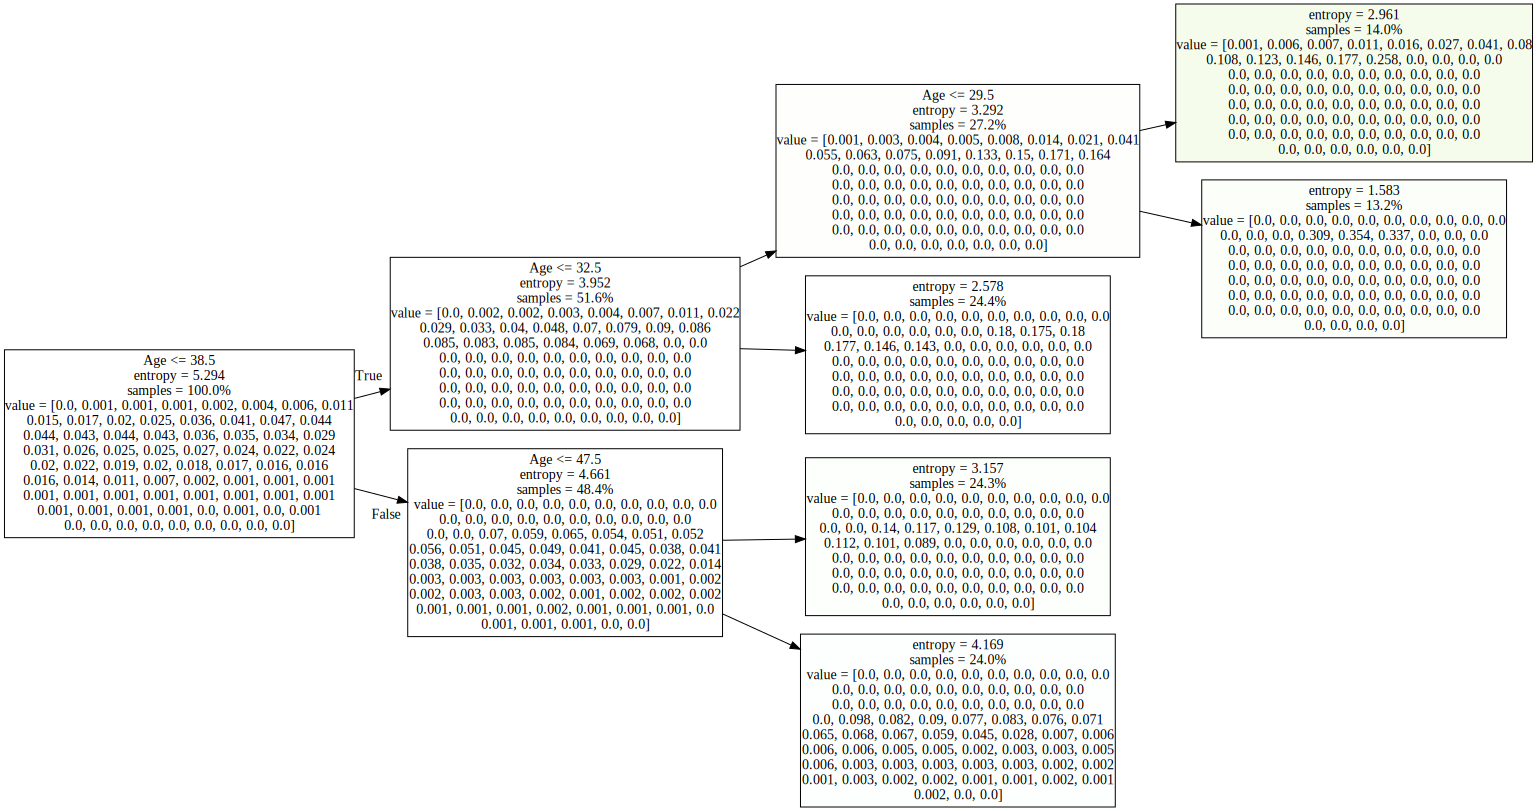

In [139]:
graphviz.Source.from_file('c50_30.dot')